In [46]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [47]:
import tensorflow as tf
tf.__version__ 

'2.12.0'

# 資料預處理

In [48]:
import tensorflow.keras.utils as np_utils
import numpy as np
import timeit

In [49]:
from tensorflow.keras.datasets import mnist 
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [50]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [51]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [52]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [53]:
print('Train feature:',x_train_normalize.shape)
print('Train label:',y_train_onehot.shape)

Train feature: (60000, 784)
Train label: (60000, 10)


In [54]:
print('Test feature:',x_test_normalize.shape)
print('Test label:',y_test_onehot.shape)

Test feature: (10000, 784)
Test label: (10000, 10)


In [55]:
!ls ~/.keras/datasets

mnist.npz


# 建立模型

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [57]:
model = Sequential()

In [58]:
model.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))

In [59]:
model.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))

In [60]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


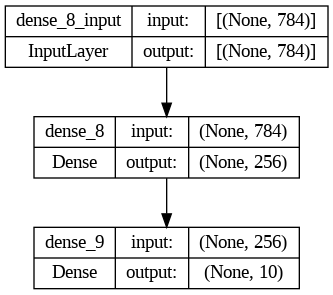

In [61]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [62]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [63]:
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
240/240 [==============================] - 3s 10ms/step - loss: 0.4358 - acc: 0.8850 - val_loss: 0.2111 - val_acc: 0.9408
Epoch 2/10
240/240 [==============================] - 3s 11ms/step - loss: 0.1853 - acc: 0.9472 - val_loss: 0.1520 - val_acc: 0.9574
Epoch 3/10
240/240 [==============================] - 4s 16ms/step - loss: 0.1313 - acc: 0.9621 - val_loss: 0.1252 - val_acc: 0.9643
Epoch 4/10
240/240 [==============================] - 3s 11ms/step - loss: 0.1003 - acc: 0.9712 - val_loss: 0.1090 - val_acc: 0.9683
Epoch 5/10
240/240 [==============================] - 3s 13ms/step - loss: 0.0794 - acc: 0.9774 - val_loss: 0.0988 - val_acc: 0.9698
Epoch 6/10
240/240 [==============================] - 2s 9ms/step - loss: 0.0642 - acc: 0.9828 - val_loss: 0.0903 - val_acc: 0.9722
Epoch 7/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0527 - acc: 0.9850 - val_loss: 0.0876 - val_acc: 0.9734
Epoch 8/10
240/240 [==============================] - 3s 11ms/step - l

# 1.With and without GPU

In [64]:
model_cpu = Sequential()
model_cpu.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))
model_cpu.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_cpu.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [65]:
model_gpu = Sequential()
model_gpu.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))
model_gpu.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_gpu.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [ ]:
def cpu():
  with tf.device('/cpu:0'):
    train_history_cpu=model_cpu.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=200,epochs=10,verbose=1)
def gpu():
  with tf.device('/device:GPU:0'):
    train_history_gpu=model_gpu.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=200,epochs=10,verbose=1)

print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=1, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=1, setup="from __main__ import gpu")
print(gpu_time)

CPU (s):
Epoch 1/10
240/240 [==============================] - 4s 14ms/step - loss: 0.4375 - acc: 0.8844 - val_loss: 0.2251 - val_acc: 0.9383
Epoch 2/10
240/240 [==============================] - 2s 10ms/step - loss: 0.1906 - acc: 0.9459 - val_loss: 0.1556 - val_acc: 0.9565
Epoch 3/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1361 - acc: 0.9617 - val_loss: 0.1310 - val_acc: 0.9632
Epoch 4/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1049 - acc: 0.9701 - val_loss: 0.1089 - val_acc: 0.9678
Epoch 5/10
240/240 [==============================] - 2s 9ms/step - loss: 0.0827 - acc: 0.9762 - val_loss: 0.1041 - val_acc: 0.9696
Epoch 6/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0692 - acc: 0.9806 - val_loss: 0.0922 - val_acc: 0.9707
Epoch 7/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0560 - acc: 0.9850 - val_loss: 0.0859 - val_acc: 0.9732
Epoch 8/10
240/240 [==============================] - 2s 9ms/st

# 2.Different Batch Size:100 and 600

In [ ]:
model_100 = Sequential()
model_100.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))
model_100.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_100.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [ ]:
model_600 = Sequential()
model_600.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))
model_600.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_600.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [ ]:
train_history_100_batch_size=model_100.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=100,epochs=10,verbose=1)
train_history_600_batch_size=model_600.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=600,epochs=10,verbose=1)

# 3.Different Active function:sigmoid and relu






In [ ]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='sigmoid'))
model_sigmoid.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_sigmoid.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [71]:
train_history_sigmoid=model_sigmoid.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
240/240 [==============================] - 3s 10ms/step - loss: 0.7490 - acc: 0.8263 - val_loss: 0.3377 - val_acc: 0.9107
Epoch 2/10
240/240 [==============================] - 2s 9ms/step - loss: 0.3105 - acc: 0.9134 - val_loss: 0.2600 - val_acc: 0.9263
Epoch 3/10
240/240 [==============================] - 2s 9ms/step - loss: 0.2500 - acc: 0.9284 - val_loss: 0.2220 - val_acc: 0.9376
Epoch 4/10
240/240 [==============================] - 2s 9ms/step - loss: 0.2127 - acc: 0.9380 - val_loss: 0.1957 - val_acc: 0.9457
Epoch 5/10
240/240 [==============================] - 3s 12ms/step - loss: 0.1847 - acc: 0.9464 - val_loss: 0.1799 - val_acc: 0.9500
Epoch 6/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1627 - acc: 0.9528 - val_loss: 0.1618 - val_acc: 0.9559
Epoch 7/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1444 - acc: 0.9588 - val_loss: 0.1498 - val_acc: 0.9587
Epoch 8/10
240/240 [==============================] - 2s 9ms/step - loss: 

# 4.With and Without Dropout 

In [72]:
from keras.layers import Dropout
model_dropout = Sequential()
model_dropout.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_dropout.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [73]:
train_history_dropout=model_dropout.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=200,epochs=10,verbose=1)

Epoch 1/10
240/240 [==============================] - 3s 11ms/step - loss: 0.4710 - acc: 0.8716 - val_loss: 0.2163 - val_acc: 0.9400
Epoch 2/10
240/240 [==============================] - 3s 13ms/step - loss: 0.2074 - acc: 0.9413 - val_loss: 0.1543 - val_acc: 0.9564
Epoch 3/10
240/240 [==============================] - 2s 10ms/step - loss: 0.1522 - acc: 0.9572 - val_loss: 0.1265 - val_acc: 0.9641
Epoch 4/10
240/240 [==============================] - 2s 10ms/step - loss: 0.1206 - acc: 0.9649 - val_loss: 0.1111 - val_acc: 0.9692
Epoch 5/10
240/240 [==============================] - 2s 10ms/step - loss: 0.1005 - acc: 0.9706 - val_loss: 0.0978 - val_acc: 0.9709
Epoch 6/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0857 - acc: 0.9752 - val_loss: 0.0918 - val_acc: 0.9725
Epoch 7/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0729 - acc: 0.9787 - val_loss: 0.0829 - val_acc: 0.9757
Epoch 8/10
240/240 [==============================] - 2s 10ms/step - 

# 5. Different Optimizer:SGD and Adam

In [ ]:
model_SGD = Sequential()
model_SGD.add(Dense(input_dim=784,
     kernel_initializer='normal',units=256, 
     activation='relu'))
model_SGD.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))
model_SGD.compile(
    metrics=['acc'],optimizer='SGD',
    loss='categorical_crossentropy')

In [ ]:
train_history_SGD=model_SGD.fit(x=x_train_normalize,y=y_train_onehot,
        validation_split=0.2,batch_size=200,epochs=10,verbose=1)

# 以圖形比較每一題訓練過程

In [76]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key,title,train_history2,train_key2,valid_key2,title2):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title(title)
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.plot(train_history2.history[train_key],'--')
    plt.plot(train_history2.history[valid_key])
    plt.title(title2)
    plt.ylabel(train_key2)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 2.Different Batch Size:100 and 600

In [ ]:
show_train_history(train_history_100_batch_size,'acc','val_acc','100 batch size',train_history_600_batch_size,'acc','val_acc','600 batch size')

In [ ]:
show_train_history(train_history_100_batch_size,'loss','val_loss','100 batch size',train_history_600_batch_size,'loss','val_loss','600 batch size')

## 3.Different Active function:sigmoid and relu

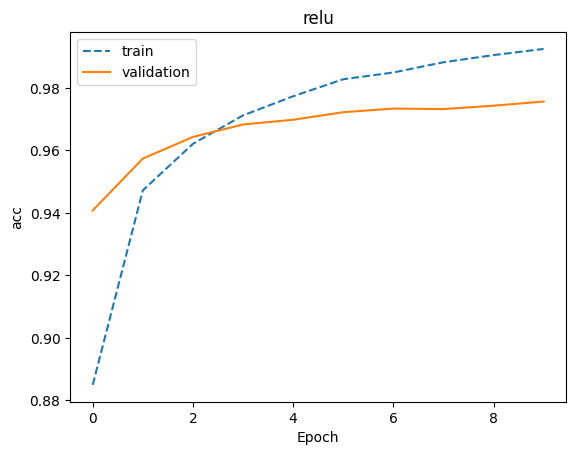

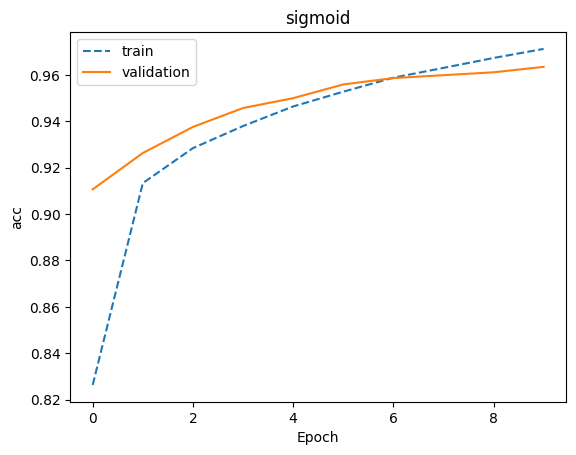

In [79]:
show_train_history(train_history,'acc','val_acc','relu',train_history_sigmoid,'acc','val_acc','sigmoid')

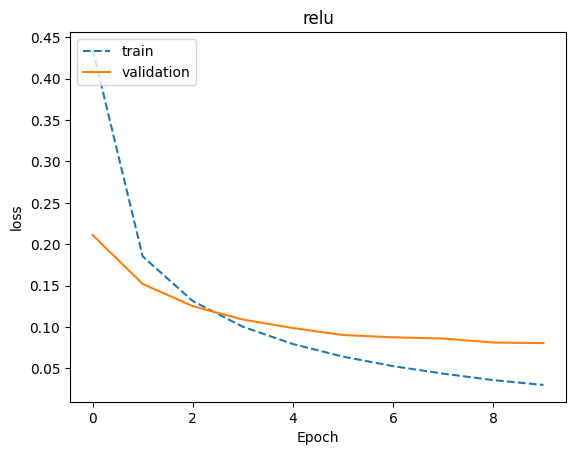

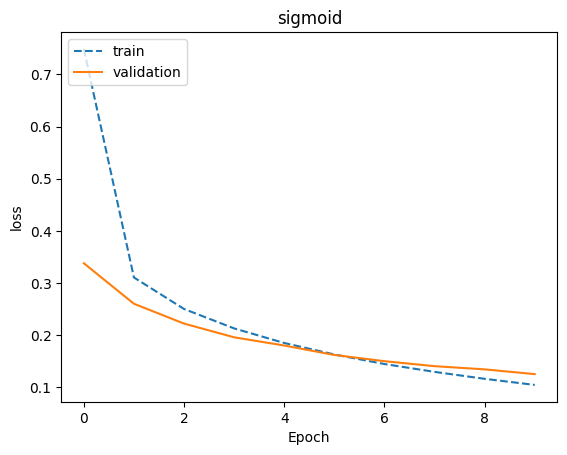

In [80]:
show_train_history(train_history,'loss','val_loss','relu',train_history_sigmoid,'loss','val_loss','sigmoid')

## 4.With and Without Dropout

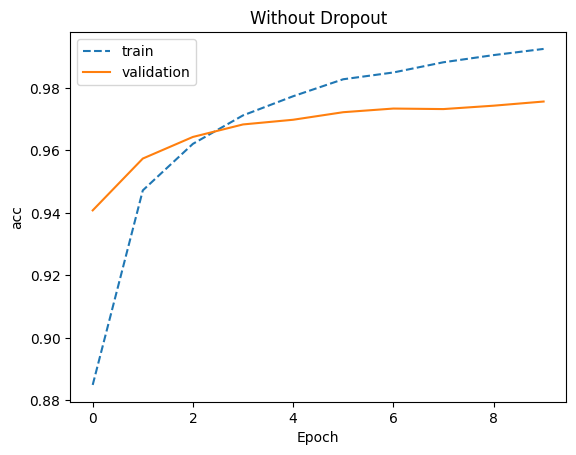

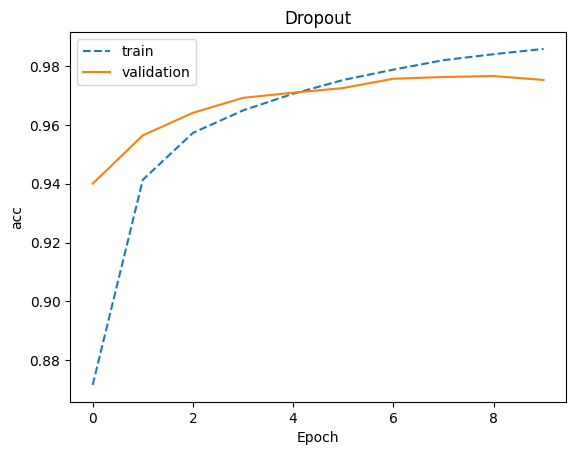

In [81]:
show_train_history(train_history,'acc','val_acc','Without Dropout',train_history_dropout,'acc','val_acc','Dropout')

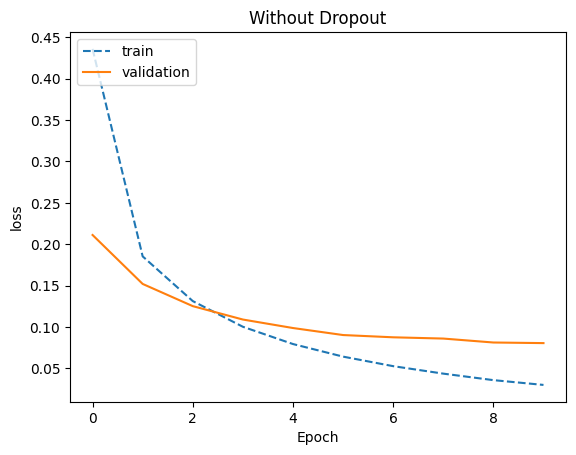

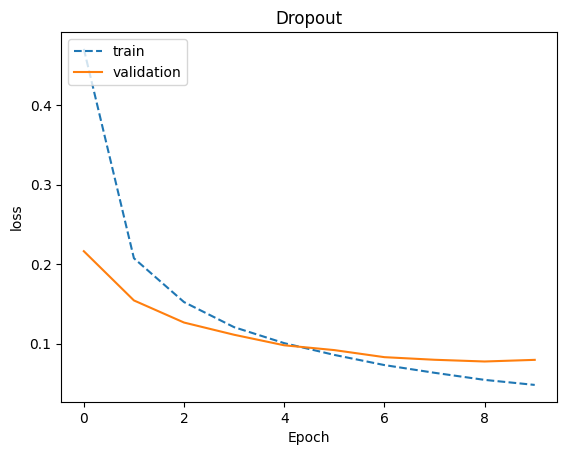

In [82]:
show_train_history(train_history,'loss','val_loss','Without Dropout',train_history_dropout,'loss','val_loss','Dropout')

## 5. Different Optimizer:SGD and Adam

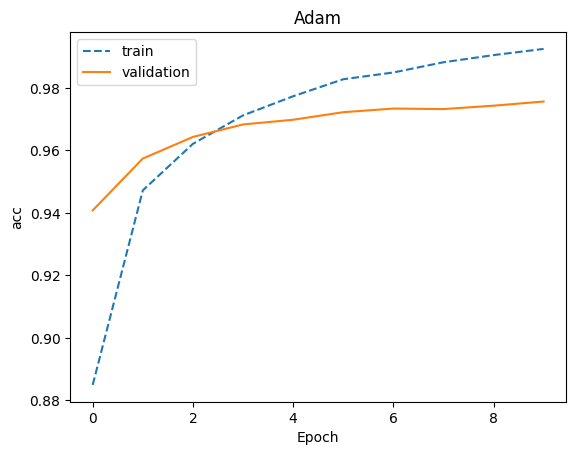

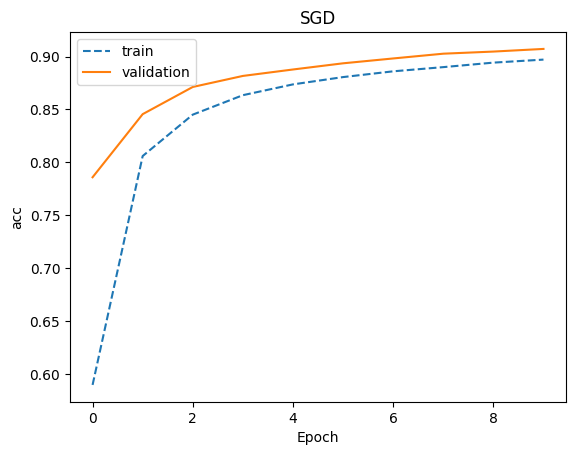

In [83]:
show_train_history(train_history,'acc','val_acc','Adam',train_history_SGD,'acc','val_acc','SGD')

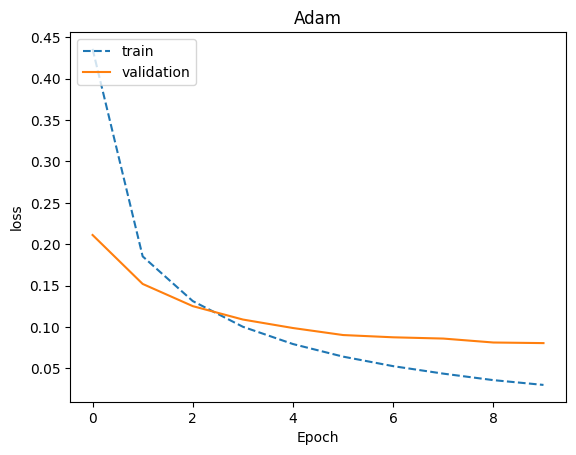

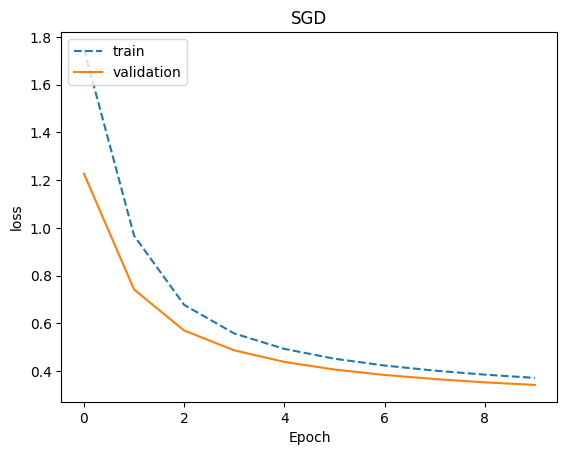

In [84]:
show_train_history(train_history,'loss','val_loss','Adam',train_history_SGD,'loss','val_loss','SGD')

# 評估模型準確率

## 2.Different Batch Size:100 and 600

In [85]:
scores_100=model_100.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0724 - acc: 0.9782 - 699ms/epoch - 2ms/step


In [86]:
print('test_loss=',scores_100[0],'test_acc=',scores_100[1])

test_loss= 0.07236815989017487 test_acc= 0.9782000184059143


In [87]:
scores_600=model_600.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0918 - acc: 0.9727 - 708ms/epoch - 2ms/step


In [88]:
print('test_loss=',scores_600[0],'test_acc=',scores_600[1])

test_loss= 0.09177234768867493 test_acc= 0.9726999998092651


## 3.Different Active function:sigmoid and relu

In [89]:
scores_sigmoid=model_sigmoid.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.1166 - acc: 0.9661 - 704ms/epoch - 2ms/step


In [90]:
print('test_loss=',scores_sigmoid[0],'test_acc=',scores_sigmoid[1])

test_loss= 0.1166139617562294 test_acc= 0.9660999774932861


In [91]:
scores_relu=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0700 - acc: 0.9784 - 715ms/epoch - 2ms/step


In [92]:
print('test_loss=',scores_relu[0],'test_acc=',scores_relu[1])

test_loss= 0.06998691707849503 test_acc= 0.9783999919891357


## 4.With and Without Dropout

In [93]:
scores_with=model_dropout.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0699 - acc: 0.9778 - 721ms/epoch - 2ms/step


In [94]:
print('test_loss=',scores_with[0],'test_acc=',scores_with[1])

test_loss= 0.06991946697235107 test_acc= 0.9778000116348267


In [95]:
scores_without=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0700 - acc: 0.9784 - 612ms/epoch - 2ms/step


In [96]:
print('test_loss=',scores_without[0],'test_acc=',scores_without[1])

test_loss= 0.06998691707849503 test_acc= 0.9783999919891357


## 5. Different Optimizer:SGD and Adam

In [97]:
scores_SGD=model_SGD.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.3425 - acc: 0.9062 - 953ms/epoch - 3ms/step


In [98]:
print('test_loss=',scores_SGD[0],'test_acc=',scores_SGD[1])

test_loss= 0.3424611985683441 test_acc= 0.9061999917030334


In [99]:
scores_Adam=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0700 - acc: 0.9784 - 916ms/epoch - 3ms/step


In [ ]:
print('test_loss=',scores_Adam[0],'test_acc=',scores_Adam[1])

# 進行預測

In [133]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()
prediction_100=tf.argmax(model_100.predict(x_test_normalize), axis=-1).numpy()
prediction_600=tf.argmax(model_600.predict(x_test_normalize), axis=-1).numpy()
prediction_sigmoid=tf.argmax(model_sigmoid.predict(x_test_normalize), axis=-1).numpy()
prediction_dropout=tf.argmax(model_dropout.predict(x_test_normalize), axis=-1).numpy()
prediction_SGD=tf.argmax(model_SGD.predict(x_test_normalize), axis=-1).numpy()

313/313 [==============================] - 1s 2ms/step


# confusion matrix

In [ ]:
import pandas as pd

## 2.Different Batch Size:100 and 600

In [134]:
cm_100=pd.crosstab(index=y_test_label,columns=prediction_100,
       rownames=['label'],colnames=['predict'])
cm_600=pd.crosstab(index=y_test_label,columns=prediction_600,
       rownames=['label'],colnames=['predict'])

In [136]:
cm_100

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,1,1,1,6,1,1,0
1,0,1120,3,1,0,1,5,1,4,0
2,7,1,985,6,5,1,5,7,15,0
3,0,0,4,985,0,6,0,5,7,3
4,2,0,0,0,952,0,9,3,1,15
5,2,0,0,9,1,866,7,0,6,1
6,5,2,0,1,4,4,938,0,4,0
7,1,6,10,1,1,1,0,1003,0,5
8,4,0,1,9,3,7,5,2,941,2


In [137]:
cm_600

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,1,1,1,6,1,1,0
1,0,1120,3,1,0,1,5,1,4,0
2,7,1,985,6,5,1,5,7,15,0
3,0,0,4,985,0,6,0,5,7,3
4,2,0,0,0,952,0,9,3,1,15
5,2,0,0,9,1,866,7,0,6,1
6,5,2,0,1,4,4,938,0,4,0
7,1,6,10,1,1,1,0,1003,0,5
8,4,0,1,9,3,7,5,2,941,2


## 3.Different Active function:sigmoid and relu

In [138]:
cm_sigmoid=pd.crosstab(index=y_test_label,columns=prediction_sigmoid,
       rownames=['label'],colnames=['predict'])
cm_relu=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [139]:
cm_sigmoid

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,964,0,2,2,0,4,6,1,1,0
1,0,1127,3,0,0,1,3,0,1,0
2,5,3,990,4,3,1,6,8,10,2
3,0,1,5,976,0,7,0,10,7,4
4,1,0,4,1,951,0,5,2,2,16
5,2,1,0,12,3,855,8,1,6,4
6,6,3,0,1,8,7,927,0,6,0
7,1,12,10,7,1,1,0,980,0,16
8,3,3,4,9,5,5,4,6,932,3


In [140]:
cm_relu

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,2,0,2,0,2,1
1,0,1125,4,0,0,1,2,0,3,0
2,4,3,1007,1,4,0,3,5,5,0
3,0,0,2,990,0,6,0,6,4,2
4,1,0,3,1,961,0,3,2,0,11
5,2,0,0,7,1,870,6,0,2,4
6,6,3,2,1,3,4,936,0,3,0
7,1,4,9,2,0,0,0,1006,0,6
8,2,1,1,4,7,8,3,4,940,4


## 4.With and Without Dropout

In [142]:
cm_dropout=pd.crosstab(index=y_test_label,columns=prediction_dropout,
       rownames=['label'],colnames=['predict'])
cm_without_dropout=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [143]:
cm_dropout

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,1,1,0,2,3,2,1,1
1,0,1124,2,1,0,1,3,0,4,0
2,4,1,1008,2,1,0,2,7,7,0
3,1,0,2,987,0,11,0,3,6,0
4,2,0,1,1,960,0,6,5,2,5
5,2,0,0,3,1,876,6,1,2,1
6,5,2,0,1,2,6,941,0,1,0
7,1,5,9,3,0,0,0,1006,1,3
8,2,0,2,7,3,6,2,5,945,2


In [144]:
cm_without_dropout

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,2,0,2,0,2,1
1,0,1125,4,0,0,1,2,0,3,0
2,4,3,1007,1,4,0,3,5,5,0
3,0,0,2,990,0,6,0,6,4,2
4,1,0,3,1,961,0,3,2,0,11
5,2,0,0,7,1,870,6,0,2,4
6,6,3,2,1,3,4,936,0,3,0
7,1,4,9,2,0,0,0,1006,0,6
8,2,1,1,4,7,8,3,4,940,4


## 5. Different Optimizer:SGD and Adam

In [145]:
cm_SGD=pd.crosstab(index=y_test_label,columns=prediction_SGD,
       rownames=['label'],colnames=['predict'])
cm_adam=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [146]:
cm_SGD

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,959,0,1,2,1,5,8,1,3,0
1,0,1105,2,4,1,0,4,2,17,0
2,13,7,883,18,16,1,22,18,45,9
3,5,0,15,908,1,33,4,13,20,11
4,2,5,4,2,900,0,12,2,9,46
5,14,5,6,43,9,759,14,8,25,9
6,17,3,7,2,15,14,894,1,5,0
7,4,19,26,4,8,0,0,921,4,42
8,9,8,7,33,10,28,13,12,839,15


In [147]:
cm_adam

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,2,0,2,0,2,1
1,0,1125,4,0,0,1,2,0,3,0
2,4,3,1007,1,4,0,3,5,5,0
3,0,0,2,990,0,6,0,6,4,2
4,1,0,3,1,961,0,3,2,0,11
5,2,0,0,7,1,870,6,0,2,4
6,6,3,2,1,3,4,936,0,3,0
7,1,4,9,2,0,0,0,1006,0,6
8,2,1,1,4,7,8,3,4,940,4
